# Spotify Audio Analysis



## Project Introduction <a class="anchor" id="intro"></a>

#### About Spotify:
Founded in 2006, [Spotify](https://open.spotify.com/) has grown into a global leader in music streaming, offering access to millions of songs, podcasts, and other audio content. Through cutting-edge technology and advanced data analytics, Spotify provides personalized listening experiences to users, supporting both a free, ad-based model and a premium subscription service.

#### Industry Scope:
Spotify operates within the realms of music streaming, podcasting, audio content, technology, and advertising, positioning itself as a pivotal player in the digital audio space.

#### Purpose of the Analysis:
The goal of this analysis is to uncover key insights from Spotify’s extensive audio data, identifying patterns that contribute to a track's popularity. By examining features like danceability, energy, acousticness, and valence, this project aims to determine which elements make songs resonate with listeners and how these attributes vary across different genres and time frames.

#### Dataset Overview:
For this project, we utilize two robust datasets:

1. **tracks.csv** from [Spotify Datasets](https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets), containing 586,672 entries. This dataset includes:
    * **Track Details:** Track ID, song title, popularity score, duration, explicit content flag, and artist information.
    * **Audio Features:** Danceability, energy, loudness, speechiness, acousticness, instrumentalness, valence, and tempo.
    * **Additional Attributes:** Release date, key, mode, and time signature.

2. **SpotifyFeatures.csv** from [Spotify Tracks DB](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db), comprising 232,725 entries. This dataset includes:
    * **Genre Information:** Genre classification for each track.
    * **Artist and Track Data:** Artist name, track title, and track ID.
    * **Audio Features:** Acousticness, danceability, energy, liveness, loudness, speechiness, valence, and tempo.
    * **Additional Attributes:** Key, mode, duration, and time signature.

Using these datasets, this analysis delves into how audio characteristics influence track popularity, providing insights into listener preferences across different genres and time periods.

# 1: Import Libraries and Load Data

**Import Libraries**

In [60]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

**Data Load**

In [61]:
from google.colab import drive
drive.mount('/content/drive')

# Load data from Google Drive
df_tracks = pd.read_csv('/content/drive/MyDrive/Data Analysis/Python Project/Spotify Music Analysis/Tracks.csv')
df_genre = pd.read_csv('/content/drive/MyDrive/Data Analysis/Python Project/Spotify Music Analysis/SpotifyFeatures.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Overview

**Preview Data Structure**

In [62]:
# Display the first rows of each dataset
print("Tracks.csv Preview:")
df_tracks.head()

print("SpotifyFeatures.csv Preview:")
df_genre.head()


Tracks.csv Preview:
SpotifyFeatures.csv Preview:


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


**Summary Information on Each Dataset**

In [63]:
# Summary information of datasets
print("Tracks.csv Info:")
print(df_tracks.info())

print("SpotifyFeatures.csv Info:")
print(df_genre.info())

Tracks.csv Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liv

# 3. Data Cleaning

**Handle Missing Values**

In [64]:
# Drop rows with missing 'name' or 'track_name'
df_tracks.dropna(subset=['name'], inplace=True)
df_genre.dropna(subset=['track_name'], inplace=True)

**Convert Data Types**

In [65]:
# Convert release date columns to datetime
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], errors='coerce')

# Convert 'mode' to binary (0 for Minor, 1 for Major)
df_genre['mode_binary'] = df_genre['mode'].map({'Minor': 0, 'Major': 1})


**Convert Duration from Milliseconds to Seconds**

In [66]:
# Convert duration from milliseconds to seconds
df_tracks['duration'] = df_tracks['duration_ms'] / 1000
df_genre['duration'] = df_genre['duration_ms'] / 1000

# Drop original duration columns
df_tracks.drop('duration_ms', axis=1, inplace=True)
df_genre.drop('duration_ms', axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

**Summary Statistics**

In [67]:
print("Summary Statistics for Tracks.csv:")
df_genre.describe()

Summary Statistics for Tracks.csv:


,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode_binary,duration
count,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000
mean,41.127490,0.368562,0.554366,0.570958,0.148302,0.215010,-9.569896,0.120765,117.666494,0.454919,0.652030,235.121846
std,18.189986,0.354768,0.185608,0.263456,0.302769,0.198273,5.998215,0.185519,30.898942,0.260065,0.476328,118.935926
min,0.000000,0.000000,0.056900,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,0.000000,15.387000
25%,29.000000,0.037600,0.435000,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000,0.000000,182.856250
50%,43.000000,0.232000,0.571000,0.605000,0.000044,0.128000,-7.762000,0.050100,115.777500,0.444000,1.000000,220.427000
75%,55.000000,0.722000,0.692000,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054500,0.660000,1.000000,265.768000
max,100.000000,0.996000,0.989000,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000,1.000000,5552.917000


In [68]:
print("Summary Statistics for SpotifyFeatures.csv:")
df_tracks.describe()

Summary Statistics for SpotifyFeatures.csv:


,popularity,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
count,586601.000000,586601.000000,448010,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,0.044091,1993-03-23 09:16:40.761590016,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410,230.054853
min,0.000000,0.000000,1900-01-01 00:00:00,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.344000
25%,13.000000,0.000000,1980-01-01 00:00:00,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000,175.083000
50%,27.000000,0.000000,1997-01-01 00:00:00,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000,214.907000
75%,41.000000,0.000000,2011-01-01 00:00:00,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000,263.867000
max,100.000000,1.000000,2021-04-16 00:00:00,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,5621.218000
std,18.369417,0.205298,NaN,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112,126.532825


# Key EDA Visualizations

** Distribution of Track Popularity **

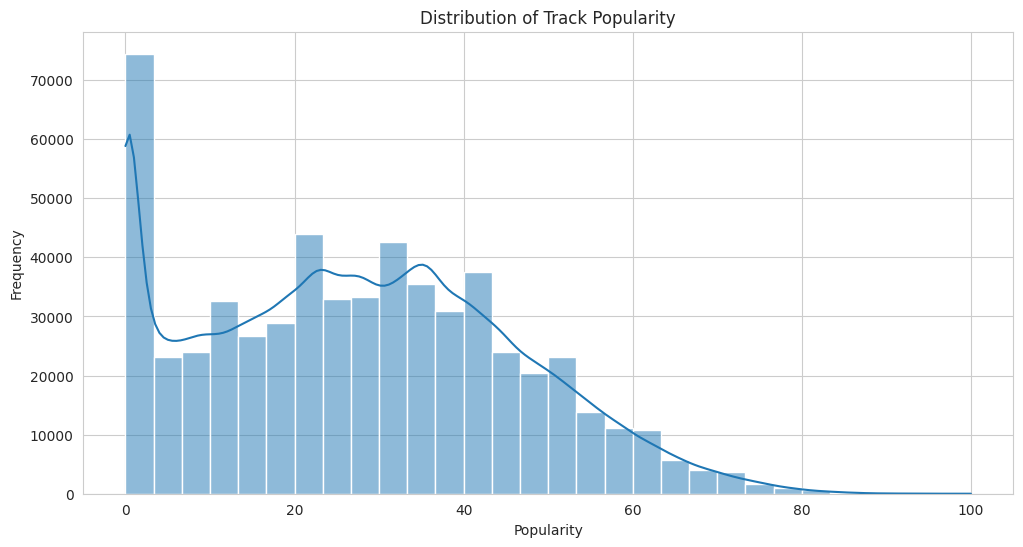

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(df_tracks['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

**Distribution of Danceability**

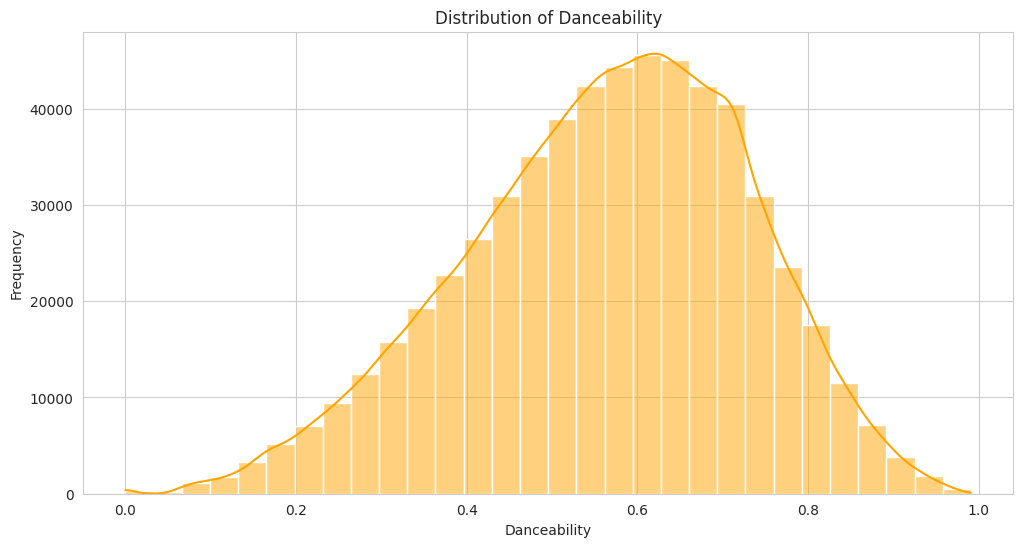

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(df_tracks['danceability'], bins=30, kde=True, color='orange')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

**Correlation Heatmap**

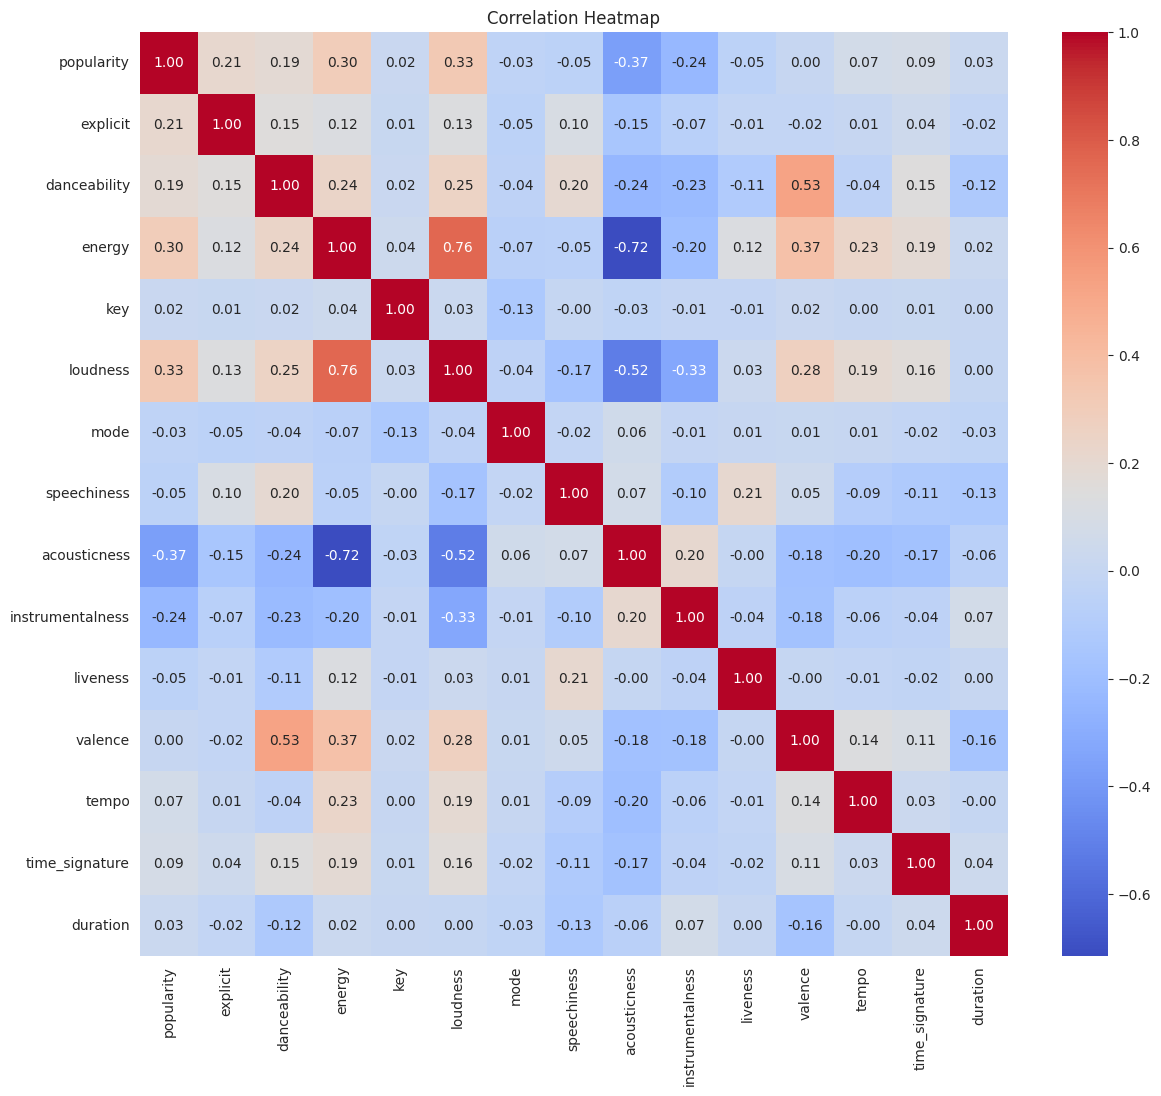

In [71]:
numeric_df = df_tracks.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Number of Songs per Year**

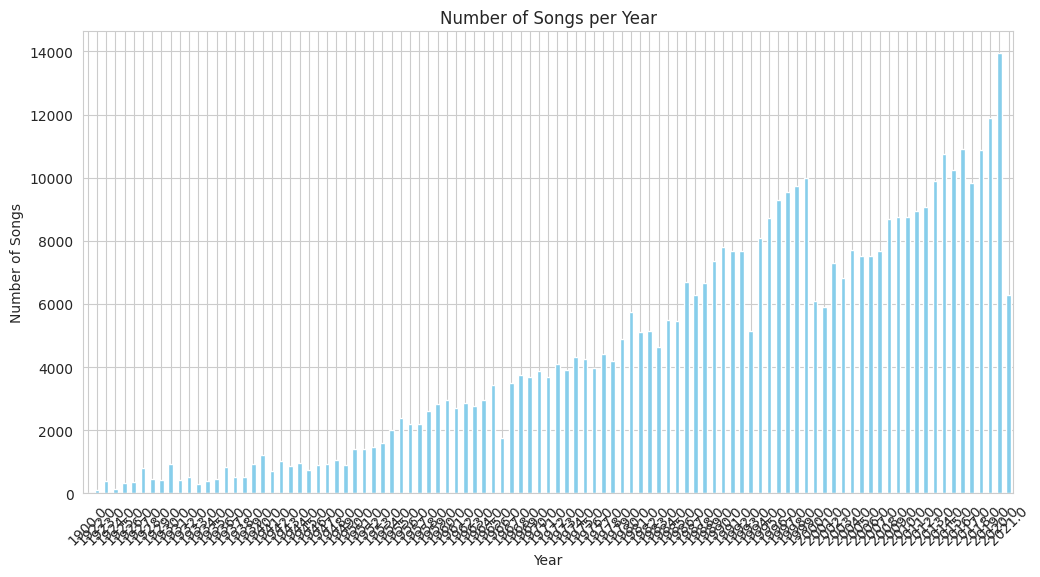

In [91]:
# Count the number of songs per year
songs_per_year = df_tracks['year'].value_counts().sort_index()

# Plotting the number of songs per year
plt.figure(figsize=(12, 6))
songs_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

**Year vs. Duration**

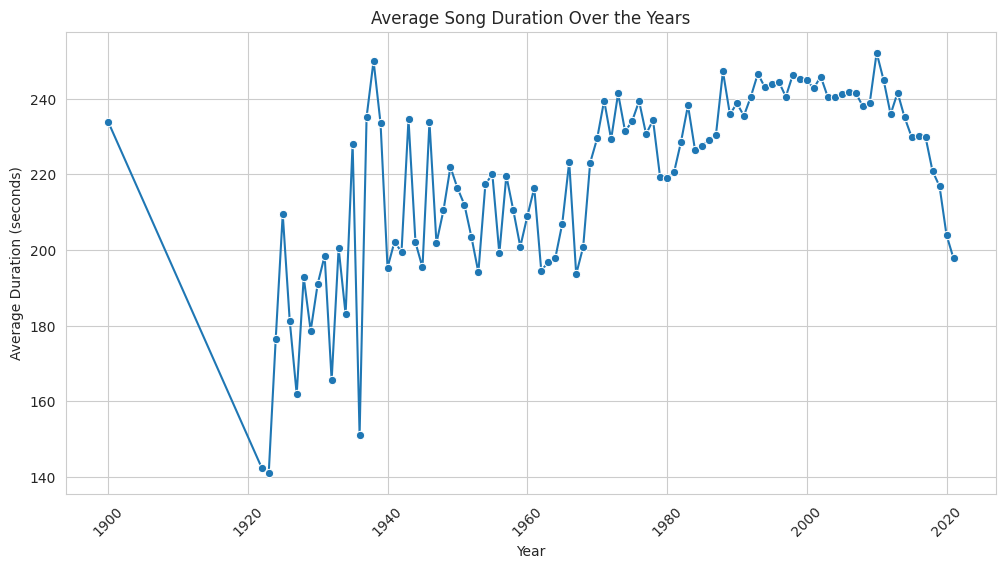

In [92]:
# Calculate the average duration of songs per year
avg_duration_per_year = df_tracks.groupby('year')['duration'].mean()

# Plotting the average duration of songs per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_duration_per_year.index, y=avg_duration_per_year.values, marker='o')
plt.title('Average Song Duration Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

**Duration of Songs in Different Genres**

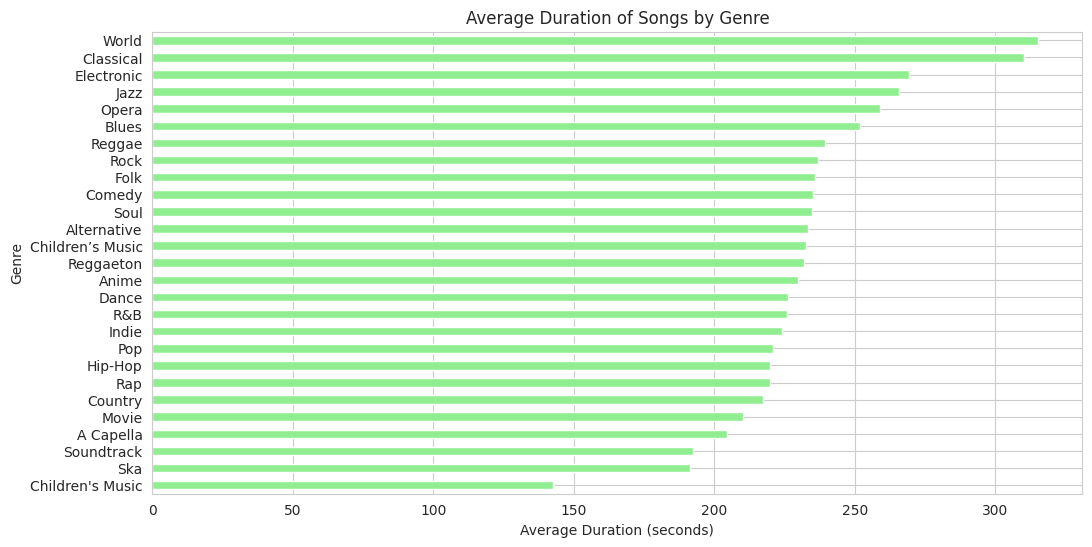

In [93]:
# Calculate the average duration of songs by genre
avg_duration_by_genre = df_genre.groupby('genre')['duration'].mean().sort_values()

# Plotting the average duration of songs by genre
plt.figure(figsize=(12, 6))
avg_duration_by_genre.plot(kind='barh', color='lightgreen')
plt.title('Average Duration of Songs by Genre')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Genre')
plt.show()

# Genre Popularity Analysis

**Top Genres by Popularity**

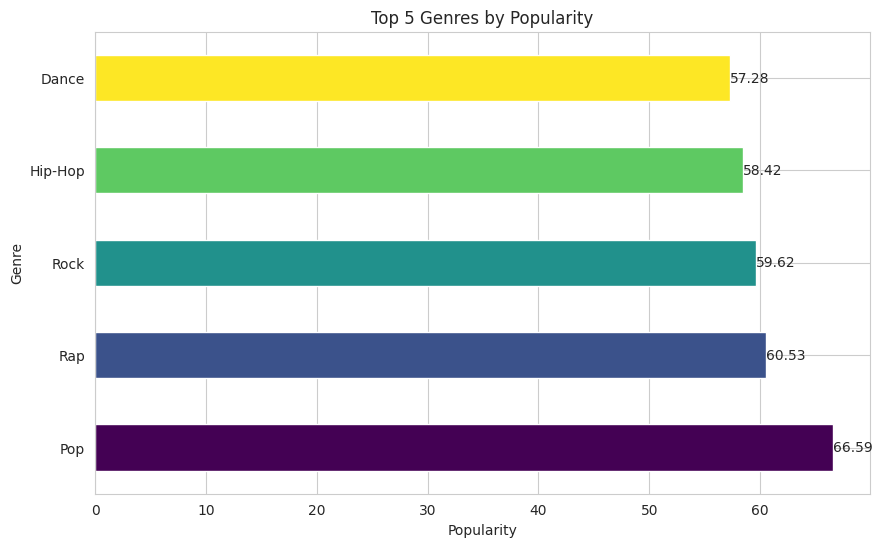

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame definition (if you haven't defined df_genre)
# Uncomment and modify as needed
# data = {
#     'genre': ['Pop', 'Rock', 'Hip-Hop', 'Jazz', 'Classical', 'Electronic'],
#     'popularity': [75, 80, 90, 70, 60, 85]
# }
# df_genre = pd.DataFrame(data)

# Calculate the top 5 genres by average popularity
top_genres = df_genre.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres)))  # Generate different colors

# Plot the horizontal bar chart
top_genres.plot(kind='barh', color=colors)

# Set the title and labels
plt.title("Top 5 Genres by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Genre")

# Add data labels on top of the bars
for index, value in enumerate(top_genres):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

# Show the plot
plt.show()

**Average Audio Features by Top Genres**

<ipython-input-73-dc816b6a30aa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_audio_features, x='genre', y=feature, palette='coolwarm')
<ipython-input-73-dc816b6a30aa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_audio_features, x='genre', y=feature, palette='coolwarm')
<ipython-input-73-dc816b6a30aa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_audio_features, x='genre', y=feature, palette='coolwarm')
<ipython-input-73-dc816b6a30aa>:16: FutureWarning: 

Passing `palette` without assigning `hue`

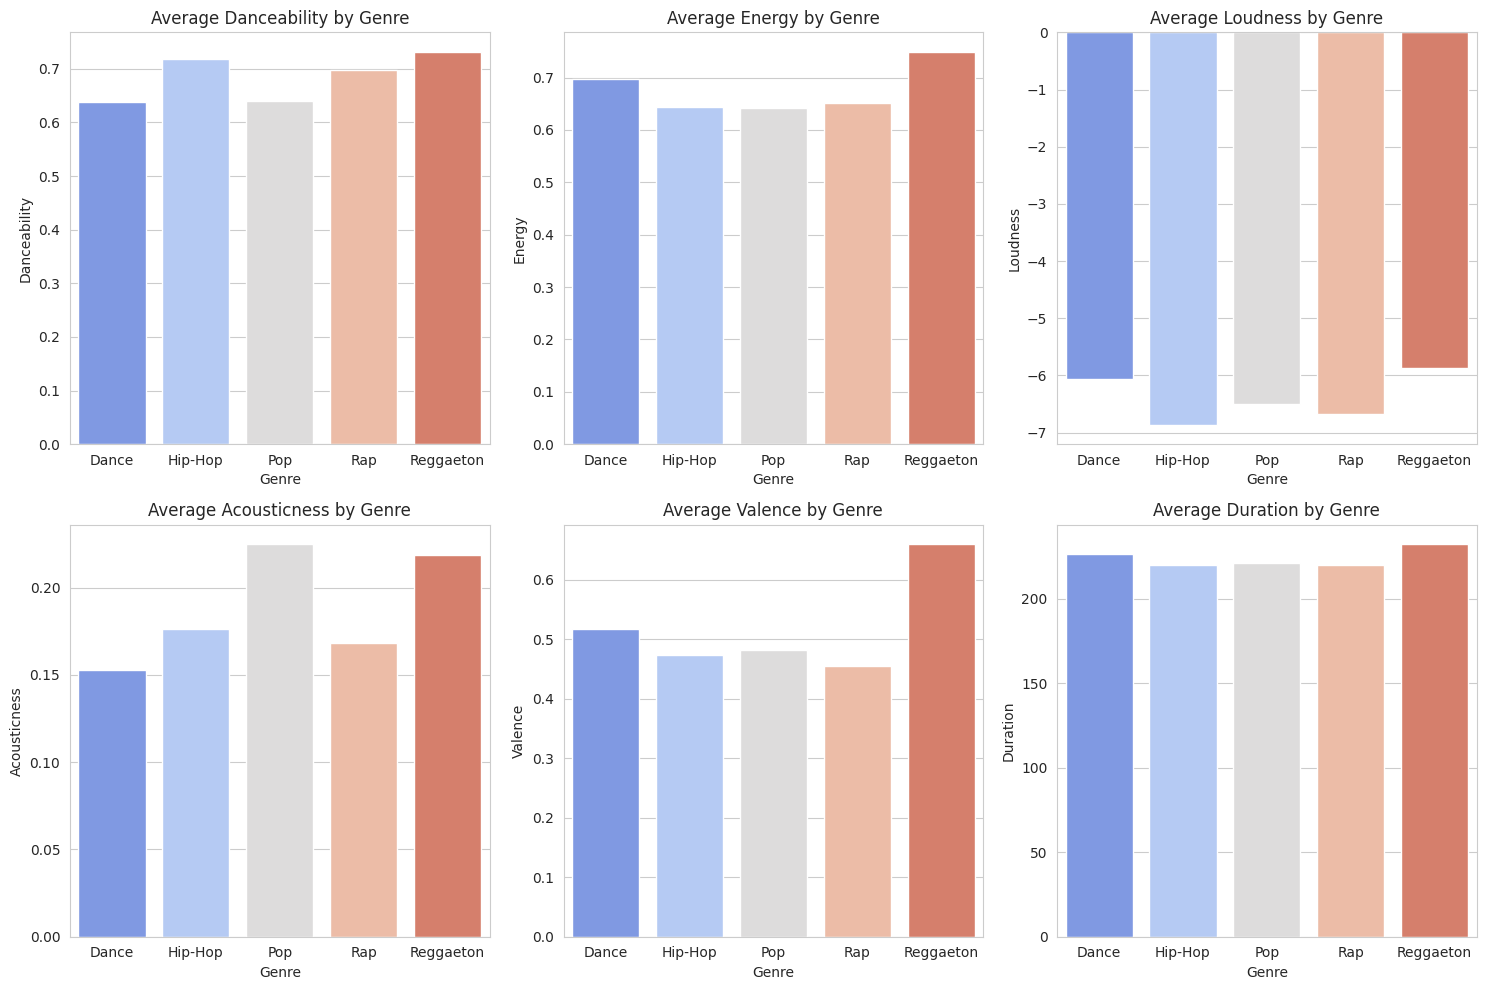

In [73]:
top_genres_list = ['Pop', 'Dance', 'Rap', 'Reggaeton', 'Hip-Hop']
filtered_df = df_genre[df_genre['genre'].isin(top_genres_list)]
genre_audio_features = filtered_df.groupby('genre').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'acousticness': 'mean',
    'valence': 'mean',
    'duration': 'mean'
}).reset_index()

# Create bar plots for each audio feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'duration']):
    plt.subplot(2, 3, i + 1)
    sns.barplot(data=genre_audio_features, x='genre', y=feature, palette='coolwarm')
    plt.title(f'Average {feature.capitalize()} by Genre')
    plt.xlabel('Genre')
    plt.ylabel(f'{feature.capitalize()}')
plt.tight_layout()
plt.show()

**Average Audio Features by Bottom Genres**

<ipython-input-74-1ba84ce7013c>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_genre_audio_features, x='genre', y=feature, palette='coolwarm')
<ipython-input-74-1ba84ce7013c>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_genre_audio_features, x='genre', y=feature, palette='coolwarm')
<ipython-input-74-1ba84ce7013c>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_genre_audio_features, x='genre', y=feature, palette='coolwarm')
<ipython-input-74-1ba84ce7013c>:39: FutureWarning: 

Passing `palette` wi

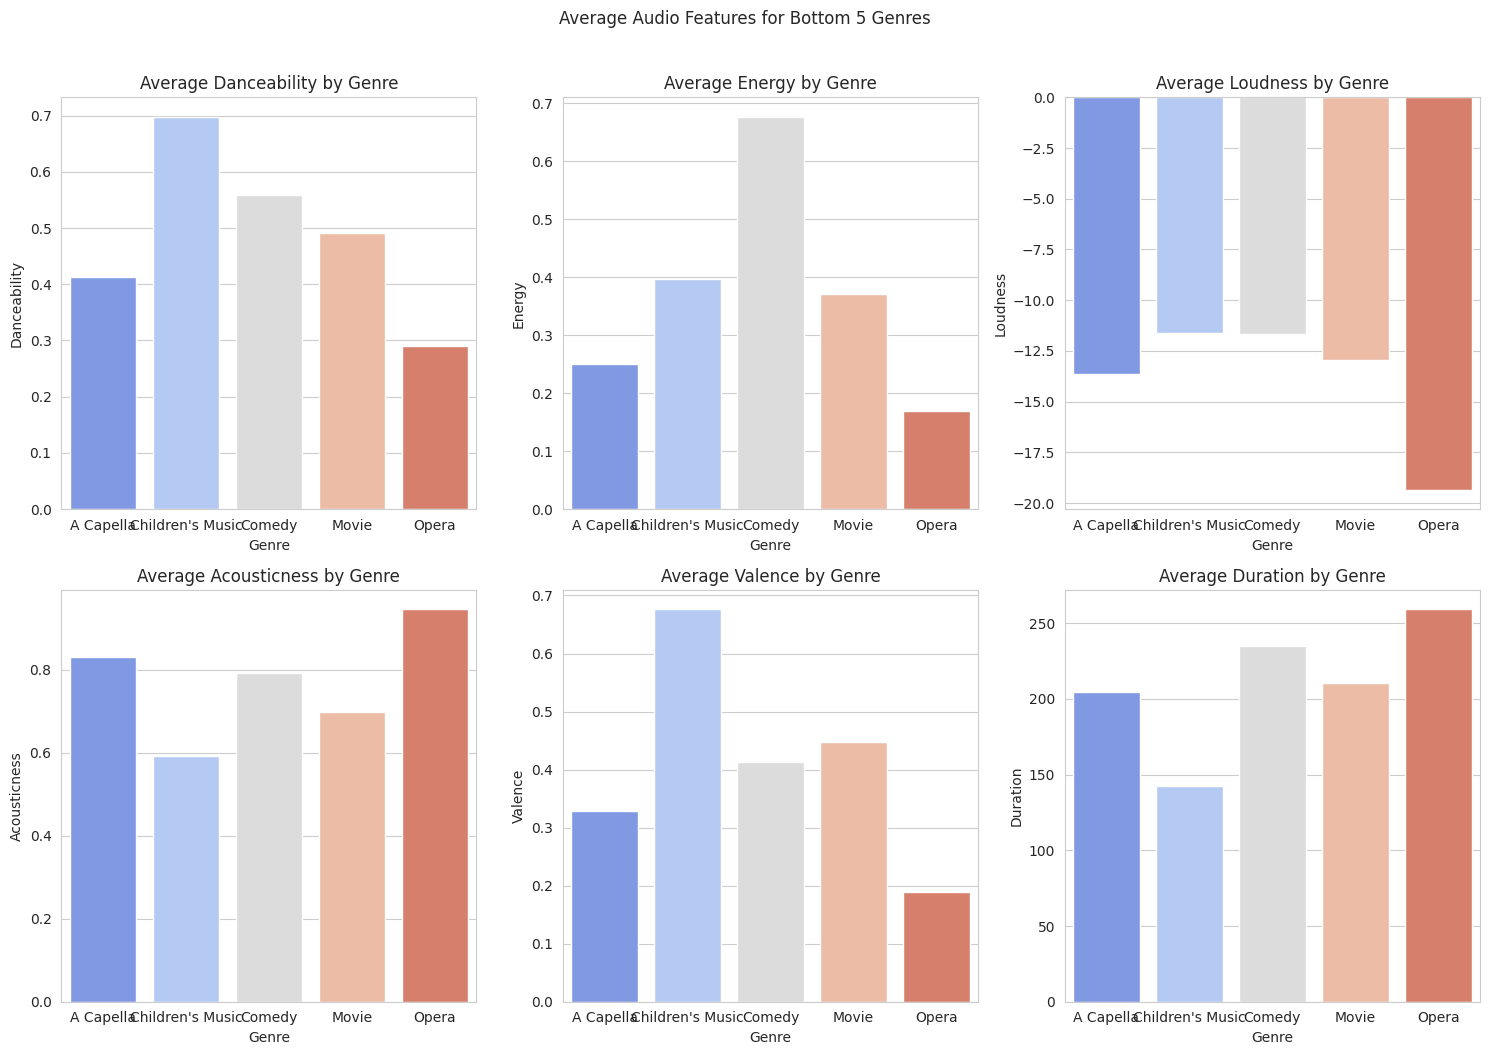

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame definition (if you haven't defined df_genre)
# Uncomment and modify as needed
# data = {
#     'genre': ['Pop', 'Dance', 'Rap', 'Reggaeton', 'Hip-Hop', 'Rock', 'Jazz', 'Classical', 'Country', 'Folk'],
#     'popularity': [75, 80, 90, 70, 60, 30, 20, 15, 25, 10],
#     'danceability': np.random.rand(10),
#     'energy': np.random.rand(10),
#     'loudness': np.random.rand(10) * 100 - 50,
#     'acousticness': np.random.rand(10),
#     'valence': np.random.rand(10),
#     'duration': np.random.randint(180000, 300000, size=10)  # Duration in milliseconds
# }
# df_genre = pd.DataFrame(data)

# Identify the bottom 5 genres by average popularity
bottom_genres = df_genre.groupby('genre')['popularity'].mean().sort_values(ascending=True).head(5)

# Filter the original DataFrame for these bottom genres
filtered_bottom_df = df_genre[df_genre['genre'].isin(bottom_genres.index)]

# Calculate average audio features for the bottom genres
bottom_genre_audio_features = filtered_bottom_df.groupby('genre').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'acousticness': 'mean',
    'valence': 'mean',
    'duration': 'mean'
}).reset_index()

# Create bar plots for each audio feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'duration']):
    plt.subplot(2, 3, i + 1)
    sns.barplot(data=bottom_genre_audio_features, x='genre', y=feature, palette='coolwarm')
    plt.title(f'Average {feature.capitalize()} by Genre')
    plt.xlabel('Genre')
    plt.ylabel(f'{feature.capitalize()}')
plt.tight_layout()
plt.suptitle("Average Audio Features for Bottom 5 Genres", y=1.05)  # Adjust title position
plt.show()

**Most Frequent Aritist**

In [85]:
# Display the columns of the df_tracks DataFrame
print(df_tracks.columns)

Index(['id', 'name', 'popularity', 'explicit', 'artists', 'id_artists',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration', 'year'],
      dtype='object')


<ipython-input-87-ca8eb1a7228c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_artists.values, y=most_frequent_artists.index, palette='viridis')


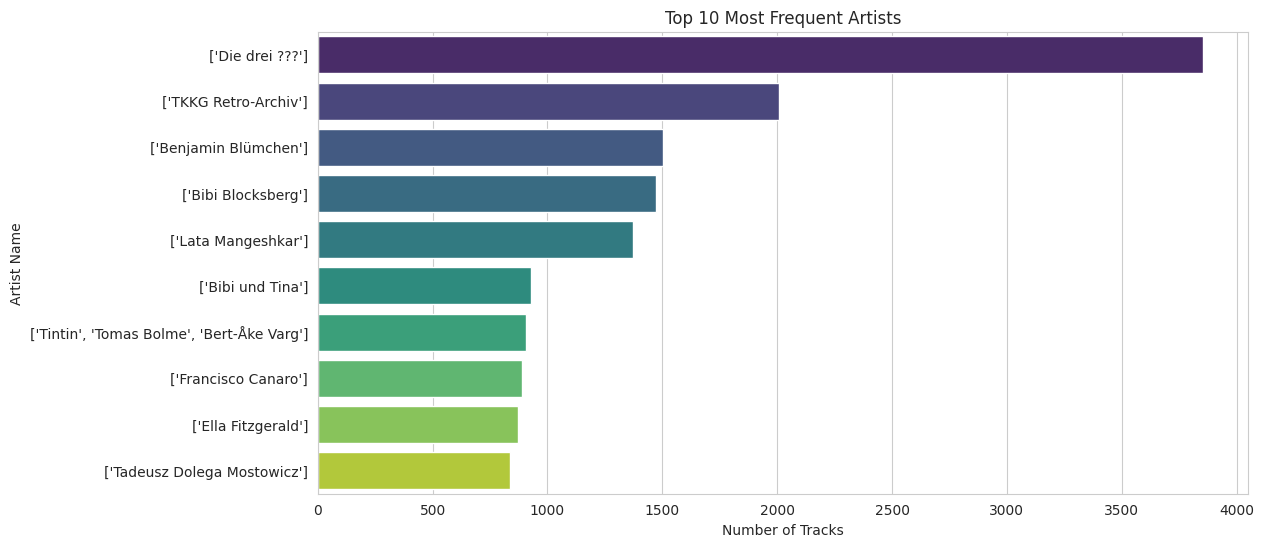

In [87]:
# Plotting the most frequent artists
plt.figure(figsize=(12, 6))
sns.barplot(x=most_frequent_artists.values, y=most_frequent_artists.index, palette='viridis')
plt.title("Top 10 Most Frequent Artists")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist Name")
plt.show()


**Time-Based Analysis**

In [75]:
# Set release_date as the index and ensure datetime format
df_tracks.set_index('release_date', inplace=True)

In [76]:
# Extract year from the release_date
df_tracks['year'] = df_tracks.index.year

# Visualize Trends Over Time

**Average Song Duration Over Time**

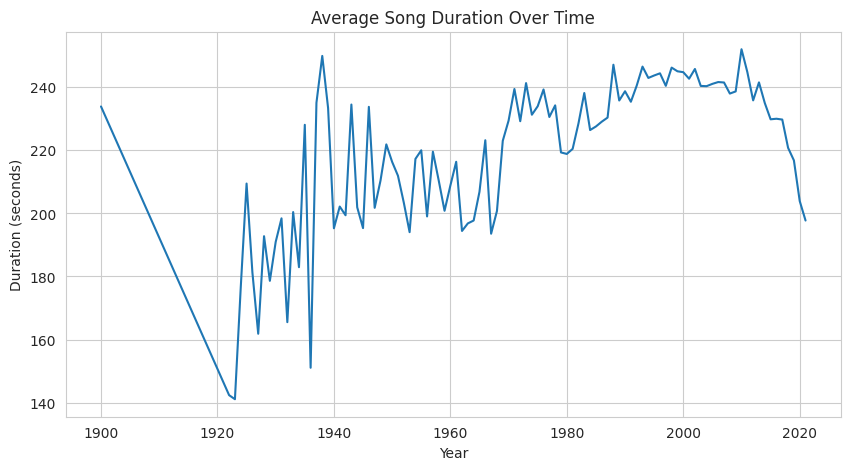

In [77]:
# Calculate average duration per year
avg_duration_per_year = df_tracks.groupby('year')['duration'].mean()

# Plotting average duration per year
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_duration_per_year.index, y=avg_duration_per_year.values)
plt.title("Average Song Duration Over Time")
plt.xlabel("Year")
plt.ylabel("Duration (seconds)")
plt.show()

**Average Popularity Over Time**

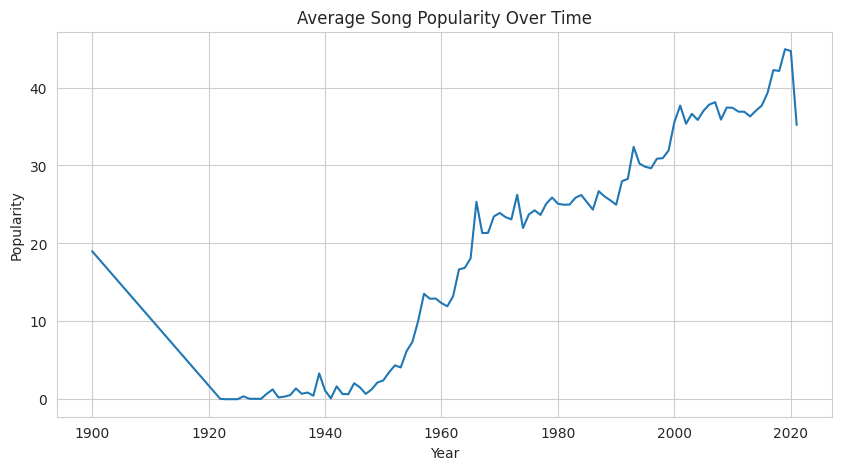

In [78]:
# Calculate average popularity per year
avg_popularity_per_year = df_tracks.groupby('year')['popularity'].mean()

# Plotting average popularity per year
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_popularity_per_year.index, y=avg_popularity_per_year.values)
plt.title("Average Song Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

**Average Danceability Over Time**

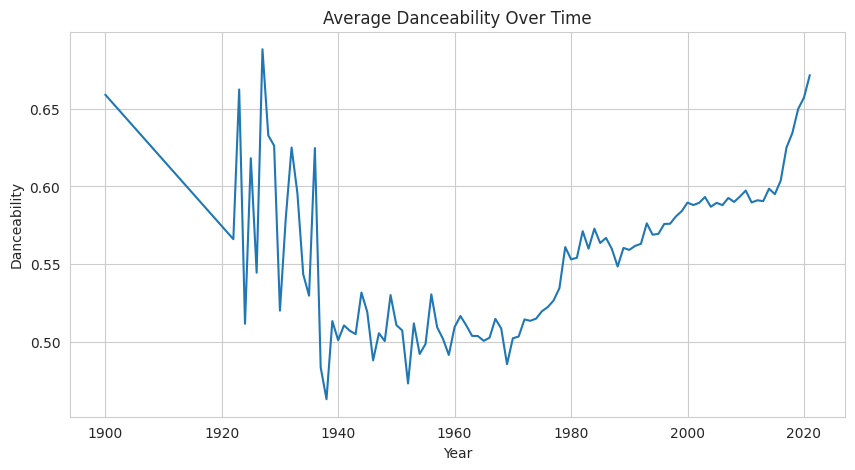

In [79]:
# Calculate average danceability per year
avg_danceability_per_year = df_tracks.groupby('year')['danceability'].mean()

# Plotting average danceability per year
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_danceability_per_year.index, y=avg_danceability_per_year.values)
plt.title("Average Danceability Over Time")
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.show()

### **Conclusions**

This comprehensive analysis of Spotify's audio data reveals significant trends and patterns that highlight the evolving nature of music consumption. Here are the key takeaways:

- **Popularity Trends**: The upward trajectory of average track popularity over the years indicates a growing engagement with Spotify’s offerings, suggesting that the platform's music selection is resonating increasingly well with listeners. This trend emphasizes the importance of continuously updating and diversifying music catalogs to cater to user preferences.

- **Evolution of Musical Characteristics**: The increase in average song duration and danceability in recent years suggests a shift towards more upbeat and rhythm-driven tracks. This could reflect listeners' preferences for music that enhances social experiences, such as dancing and gatherings. The data implies that music creators may be responding to these trends, potentially impacting the styles and formats of new releases.

- **Genre-Specific Insights**: Analysis of genre dynamics reveals that popular genres are characterized by high energy and loudness, while genres such as classical tend to have longer durations and lower energy levels. This distinction is crucial for understanding listener preferences and can guide playlist curation and recommendation systems, ensuring that users receive tailored music experiences that align with their tastes.

- **Implications for Music Recommendation Systems**: The insights gained from this analysis can inform the development of more sophisticated music recommendation algorithms. By leveraging patterns in popularity, duration, and genre characteristics, platforms can enhance user satisfaction and retention, ultimately leading to a more engaged audience.

In summary, this analysis not only uncovers trends within Spotify’s catalog but also provides actionable insights for music producers, marketers, and platform developers. By understanding user preferences and the characteristics of popular music, stakeholders can make informed decisions that enhance the overall music experience on the platform.